<a href="https://colab.research.google.com/github/mariatomy9/Major-Project/blob/ardra/help_DNN_fdp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


MFCC (Mel- frequency cepstral coefficients)

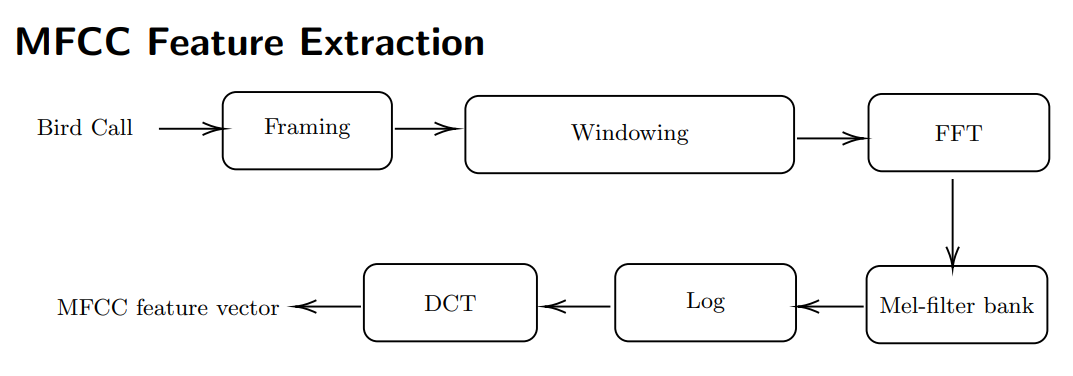

In [ ]:
from __future__ import print_function
import os
import time
import random
import glob
import librosa
import numpy as np
import librosa.display
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from numpy import loadtxt
import seaborn as sn
import pandas as pd

In [ ]:
np.random.seed(1337)

In [ ]:
import keras
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import  ModelCheckpoint
from tensorflow.keras.models import Model, load_model
from keras.layers.core import Dense, Activation
from keras.layers.core import Dropout
from keras.layers import BatchNormalization
from keras.layers import Dropout

In [ ]:
def get_mfcc_batch(file_path):
    '''*1 st function for train;returns the MFCC of training data'''
    features=[]
    print("EXTRACTING MFCC")
    #bird_wav = []
    folders=os.listdir(file_path)
    print(folders)
    for i in range(len(folders)):
        file_label=i
        print('Genre: '+folders[i])
        # print('file_label: '+str(i))
        #subfolders=os.listdir(file_path+'//'+folders[i])    
        #print(subfolders)
        #for subfolder in subfolders:
            #print(subfolder)
        for Genre in glob.glob(file_path+'/'+folders[i]+ '/*'):
                '''Refer extract_mfcc function'''
                #print(birds)   /content/drive/MyDrive/Data/genres_original/jazz/jazz.00054.wav
                
                #mfcc_features=np.mean(mfcc_features,axis=1)
                # print(mfcc_features)
                audio, sample_rate = librosa.load(Genre, res_type='kaiser_fast') 
                mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
                mfccs_processed = np.mean(mfccs.T,axis=0)
                ft_batch=mfccs_processed 
                label_batch=folders[i]
                
                features.append([ft_batch,label_batch])
    #print(label_batch)           
    print("mfcc extraction completed")       
    return features


In [ ]:
Train=r'/content/drive/MyDrive/Data/genres_original'
print("getting training data")
features= get_mfcc_batch(Train)


getting training data
EXTRACTING MFCC
['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'rock', 'reggae']
Genre: blues
Genre: classical
Genre: country
Genre: disco
Genre: hiphop
Genre: jazz
Genre: metal
Genre: pop
Genre: rock
Genre: reggae
mfcc extraction completed


In [ ]:
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])
featuresdf.head()  
pd.set_option("display.max_rows", None, "display.max_columns", None)

print(featuresdf)

                                               feature class_label
0    [-274.3658, 130.41125, -6.351286, 70.402985, 1...       blues
1    [-227.22534, 137.78807, -14.499568, 63.56093, ...       blues
2    [-249.28456, 131.00468, 0.6714352, 66.70393, 1...       blues
3    [-264.72256, 138.86844, 11.194063, 48.50426, 1...       blues
4    [-233.95625, 136.1457, 3.324411, 48.92853, 8.7...       blues
5    [-200.1993, 116.36308, 18.04737, 25.26357, 0.3...       blues
6    [-192.65746, 111.15712, 21.361006, 26.399405, ...       blues
7    [-228.1671, 130.33966, -23.310709, 70.20022, 1...       blues
8    [-221.84349, 110.852425, 18.63755, 30.92843, 3...       blues
9    [-238.9512, 108.70544, 34.145847, 30.211145, -...       blues
10   [-328.5607, 102.728516, 19.836584, 26.706007, ...       blues
11   [-248.96225, 139.03177, -16.240025, 57.11619, ...       blues
12   [-288.7151, 105.926346, 18.81995, 23.67446, 5....       blues
13   [-233.7151, 101.19902, 17.6509, 23.740635, 2.0...       b

In [ ]:
Test=r'/content/drive/MyDrive/Data/genere_test'
print("getting testing data")
features1= get_mfcc_batch(Test)

getting testing data
EXTRACTING MFCC
['blues', 'classical', 'disco', 'country', 'jazz', 'hiphop', 'pop', 'metal', 'reggae', 'rock']
Genre: blues
Genre: classical
Genre: disco
Genre: country
Genre: jazz
Genre: hiphop
Genre: pop
Genre: metal
Genre: reggae
Genre: rock
mfcc extraction completed


In [ ]:
featuresdf1 = pd.DataFrame(features1, columns=['feature1','class_label'])
featuresdf1.head()  
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(featuresdf1)

                                              feature1 class_label
0    [-209.82616, 124.46322, 10.342454, 47.010906, ...       blues
1    [-177.77425, 118.20548, -17.56588, 30.762402, ...       blues
2    [-207.22331, 132.83055, -15.4288435, 60.970924...       blues
3    [-199.5442, 150.09091, 5.6626782, 26.85908, 1....       blues
4    [-121.363945, 122.50667, -14.738195, 46.131065...       blues
5    [-245.69937, 140.49109, -2.7897542, 60.431435,...       blues
6    [-190.05237, 130.28908, -36.369534, 33.029034,...       blues
7    [-179.34714, 136.46901, -26.673138, 39.98424, ...       blues
8    [-236.65675, 138.40926, -4.9129105, 47.629173,...       blues
9    [-287.92374, 124.01875, 5.4698925, 33.65741, 1...       blues
10   [-213.23999, 115.1656, -11.693431, 39.01427, -...       blues
11   [-230.35765, 127.07833, 7.1234465, 39.7749, 1....       blues
12   [-233.7591, 120.67514, -3.1748059, 39.51848, 3...       blues
13   [-207.5017, 123.991264, 8.955127, 35.877647, 2...       b

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Convert features and corresponding classification labels into numpy arrays
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())

# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))

In [ ]:
# split the dataset 
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.1, random_state = 127)

In [ ]:
num_labels = yy.shape[1]
filter_size = 2

def build_model_graph(input_shape=(40,)):
    model = Sequential()
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_labels))
    model.add(Activation('softmax'))
    # Compile the model
    
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return model

model = build_model_graph()


In [ ]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 

num_epochs = 100
num_batch_size = 32
checkpointer = ModelCheckpoint(filepath="dnnfdp1.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')


In [ ]:
model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test),callbacks=[checkpointer])

Epoch 1/100
21/22 [===========================>..] - ETA: 0s - loss: 22.3513 - accuracy: 0.1190
Epoch 1: val_accuracy improved from -inf to 0.35065, saving model to dnnfdp1.hdf5
22/22 [==============================] - 1s 17ms/step - loss: 22.1541 - accuracy: 0.1206 - val_loss: 4.5834 - val_accuracy: 0.3506
Epoch 2/100
13/22 [================>.............] - ETA: 0s - loss: 11.2794 - accuracy: 0.2067
Epoch 2: val_accuracy did not improve from 0.35065
22/22 [==============================] - 0s 7ms/step - loss: 10.6618 - accuracy: 0.2224 - val_loss: 2.1481 - val_accuracy: 0.3247
Epoch 3/100
13/22 [================>.............] - ETA: 0s - loss: 7.6816 - accuracy: 0.2332
Epoch 3: val_accuracy did not improve from 0.35065
22/22 [==============================] - 0s 7ms/step - loss: 6.9410 - accuracy: 0.2471 - val_loss: 2.0403 - val_accuracy: 0.2987
Epoch 4/100
13/22 [================>.............] - ETA: 0s - loss: 5.5449 - accuracy: 0.2644
Epoch 4: val_accuracy did not improve from 0

In [ ]:
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: {0:.2%}".format(score[1]))

Training Accuracy: 94.77%


In [ ]:
X1 = np.array(featuresdf1.feature1.tolist())
y1 = np.array(featuresdf1.class_label.tolist())
# print(X1)
print(len(X1))

ynew = model.predict(X1)
# show the inputs and predicted probabilities
pred_label = []
original=[]
for i in range(len(X1)):
  Predicted=ynew[i]
  # print(Predicted)
  # # print("X=%s,\n Predicted=%s" % (X1[i], ynew[i]))
  pred_final1 = np.argmax(Predicted)
  pred_label.append(pred_final1)
  y1 = np.array(featuresdf1.class_label.tolist())
#for i in range(len(y1)):
    #p=y1[i]
    #l=[]
labels = {'blues': 0,'classical': 1,'country': 2,'disco':3,'hiphop':4,'jazz': 5,'metal': 6,'pop': 7,'rock':8,'reggae': 9}
for num in range(len(y1)):
      # print(num)
      for keys,values in labels.items():
        if y1[num]==keys:
          original.append(labels[keys])
   # print(p)
print(original)
print(pred_label)


210
7/7 [==============================] - 0s 5ms/step
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
[2, 5, 0, 2, 3, 0, 1, 2, 5, 2, 5, 5, 5, 4, 0, 2, 3, 1, 8, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 9, 3, 9, 9, 9, 3, 4, 9, 4, 7, 5, 4, 2, 8, 9, 9, 9, 3, 9, 8, 7, 3, 7, 7, 2, 5, 4, 9, 7, 2, 2, 5, 5, 7, 5, 0, 2, 5, 5, 7, 2, 1, 5, 5, 1, 1, 5, 1, 5, 2, 5, 1, 1, 5, 5, 5, 5, 5, 2, 3, 5, 5

In [ ]:
original=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
pred_label=[2, 5, 0, 2, 3, 0, 1, 2, 5, 2, 5, 5, 5, 4, 0, 2, 3, 1, 8, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 9, 3, 9, 9, 9, 3, 4, 9, 4, 7, 5, 4, 2, 8, 9, 9, 9, 3, 9, 8, 7, 3, 7, 7, 2, 5, 4, 9, 7, 2, 2, 5, 5, 7, 5, 0, 2, 5, 5, 7, 2, 1, 5, 5, 1, 1, 5, 1, 5, 2, 5, 1, 1, 5, 5, 5, 5, 5, 2, 3, 5, 5, 3, 0, 2, 6, 3, 3, 3, 4, 4, 8, 6, 4, 3, 3, 1, 3, 6, 2, 4, 3, 4, 8, 3, 4, 7, 7, 7, 7, 7, 7, 7, 3, 1, 7, 7, 7, 9, 7, 7, 9, 7, 8, 6, 6, 6, 6, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 0, 4, 2, 2, 3, 2, 4, 3, 8, 9, 2, 2, 8, 3, 3, 8, 8, 8, 8, 2, 2, 2, 2, 4, 9, 9, 0, 2, 9, 2, 2, 4, 8, 9, 5, 2, 6, 3, 9, 6, 9]

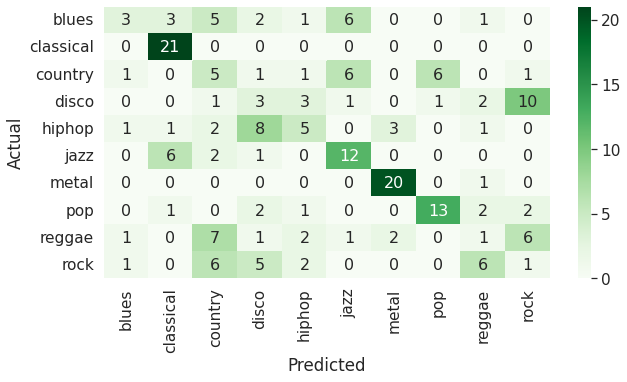

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

y_label = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'rock', 'reggae']

cm=confusion_matrix(original,pred_label)
df_cm = pd.DataFrame(cm, columns=np.unique(y_label), index = np.unique(y_label))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,5))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Greens", annot=True,annot_kws={"size": 16})# font size

In [ ]:
import numpy as np
TP = np.diag(cm)
# print(TP)
FP = np.sum(cm, axis=0) - TP
# print(FP)
FN = np.sum(cm, axis=1) - TP
# print(FN)
num_classes = 10
TN = []
for i in range(num_classes):
    temp = np.delete(cm, i, 0)    # delete ith row
    temp = np.delete(temp, i, 1)  # delete ith column
    TN.append(sum(sum(temp)))
# print(TN)
# l = 10000
# total
# for i in range(num_classes):
#     print(TP[i] + FP[i] + FN[i] + TN[i])
precision = TP/(TP+FP)
print(precision)
recall = TP/(TP+FN)
print(recall)
# specificity = TN/(TN+FP)
# print(specificity)
F1score= 2*((precision*recall)/(precision+recall))
print(F1score)
test_accuracy = (TP + TN) / (TP + TN + FP + FN)
print("test_accuracy",test_accuracy)
print(np.mean(test_accuracy))

[0.42857143 0.65625    0.17857143 0.13043478 0.33333333 0.46153846
 0.8        0.65       0.07142857 0.05      ]
[0.14285714 1.         0.23809524 0.14285714 0.23809524 0.57142857
 0.95238095 0.61904762 0.04761905 0.04761905]
[0.21428571 0.79245283 0.20408163 0.13636364 0.27777778 0.5106383
 0.86956522 0.63414634 0.05714286 0.04878049]
test_accuracy [0.8952381  0.94761905 0.81428571 0.81904762 0.87619048 0.89047619
 0.97142857 0.92857143 0.84285714 0.81428571]
0.8799999999999999
